**Reproduced from** 
https://www.kaggle.com/aceccon/2-iris-dataset-basic-classification-algorithms

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

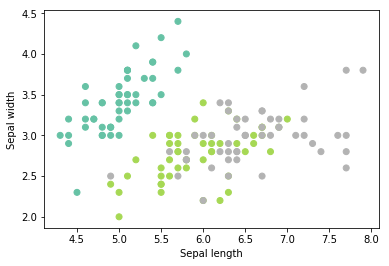

In [3]:
x = iris.data[:,:2]
y = iris.target

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Set2)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [4]:
# for machine learning part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [5]:
# svm classification
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.21, C=1.9)
svm.fit(x_train_std, y_train)
print('Traning score: {}'.format(svm.score(x_train_std, y_train)))
print('Testing score: {}'.format(svm.score(x_test_std, y_test)))

Traning score: 0.9714285714285714
Testing score: 0.9777777777777777


In [6]:
# knn classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, p = 1, metric='minkowski')
knn.fit(x_train_std, y_train)

print('Traning score: {}'.format(knn.score(x_train_std, y_train)))
print('Testing score: {}'.format(knn.score(x_test_std, y_test)))

Traning score: 0.9619047619047619
Testing score: 0.9777777777777777


In [7]:
# Tree - XGboost
import xgboost as xgb

xgb_cls = xgb.XGBClassifier()
xgb_cls.fit(x_train_std, y_train)


print('Traning score: {}'.format(xgb_cls.score(x_train_std, y_train)))
print('Testing score: {}'.format(xgb_cls.score(x_test_std, y_test)))

Traning score: 1.0
Testing score: 0.9777777777777777


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
# descision tree classification
from sklearn import tree

cls_tree = tree.DecisionTreeClassifier(criterion='gini')
cls_tree.fit(x_train_std, y_train)

print('Traning score: {}'.format(cls_tree.score(x_train_std, y_train)))
print('Testing score: {}'.format(cls_tree.score(x_test_std, y_test)))

Traning score: 1.0
Testing score: 0.9777777777777777


In [9]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier()
rnd_forest.fit(x_train_std, y_train)

print('Traning score: {}'.format(rnd_forest.score(x_train_std, y_train)))
print('Testing score: {}'.format(rnd_forest.score(x_test_std, y_test)))

Traning score: 0.9904761904761905
Testing score: 0.9555555555555556
